# 1: Tutorial

In [1]:
from renom_q import *

## Calculation

Define qubits and classical bits

In [2]:
q = QuantumRegister(2)     #(the number of qubits)
c = ClassicalRegister(2)     #(the number of claassical bits)

Define the quantum circuit

In [3]:
qc = QuantumCircuit(q, c)

Change quantum state with gate

In [4]:
qc.h(q[0])      #(target bit)
qc.cx(q[0], q[1])      #(control bit, target bit)

Observe quantum state and store it in classical bit

In [5]:
for i in range(2):
    qc.measure(q[i], c[i])         #(qubit, classical bit)

Execute observation of the quantum circuit (measurement times can be omitted)

In [6]:
r = execute(qc, shots=1000)

## Result

Display measurement result (text mode)

In [7]:
print(r)

{'00': 517, '11': 483}


Display measurement result (histogram mode)

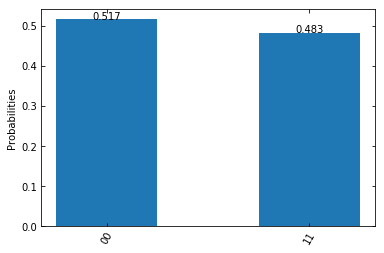

In [8]:
plot_histogram(r)

Display state vector of qubit

In [9]:
print(qc.Qr.qubit)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### When displaying matrix calculations of changes in quantum states

{'00': 509, '11': 515}


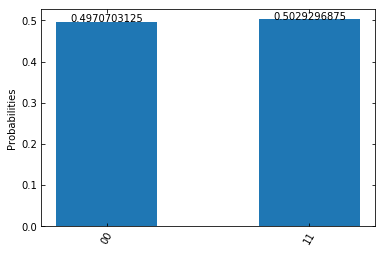

In [10]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c, set_print_matrix=True)        #Record calculation log with 'set_print_matrix=True'

qc.h(q[0])     
qc.cx(q[0], q[1])
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

Display matrix calculation of quantum state change

In [11]:
print_matrix(qc)      #(quantum circuit)

---------------- result qubit ----------------
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
---------------- h(q[0]) ----------------
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]・

[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] = 

[[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]]
---------------- cx(q[0], q[1]) ----------------
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]・

[[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]] = 

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]


Display matrix calculation of quantum state change　(Add tensor product calculation)

In [12]:
print_matrix(qc, tensorgate=True)      #(quantum circuit)

---------------- result qubit ----------------
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
---------------- h(q[0]) ----------------
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]・

[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] = 

[[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]]
---------------- H ⊗ I ----------------
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] ⊗ 

[[1. 0.]
 [0. 1.]] = 

[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]
---------------- cx(q[0], q[1]) ----------------
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]・

[[0.70710678+0.j]
 [0

### When drawing a quantum circuit

{'00': 537, '11': 487}


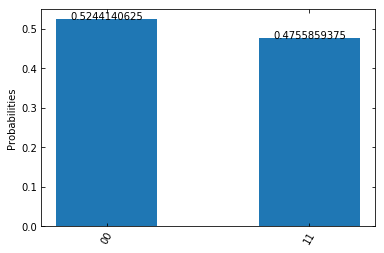

In [13]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c, set_qasm=True)        #Record the qasm code of quantum circuit with 'set_qasm=True'

qc.h(q[0])     
qc.cx(q[0], q[1])
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

You can draw the circuit using the drawing function of [Qiskit](https://qiskit.org/), a software development kit for quantum computers provided by IBM.

In [14]:
from qiskit import QuantumCircuit as qiskit_qc
from qiskit.tools.visualization import circuit_drawer

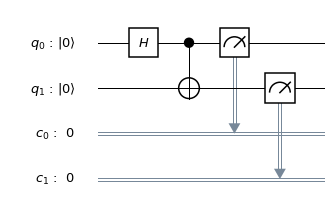

In [15]:
qasm =  qiskit_qc.from_qasm_str(qc.qasm())
circuit_drawer(qasm, output='mpl')